In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('btc_5years.csv', skiprows=3)

In [3]:
header_df = pd.read_csv('btc_5years.csv', nrows=1)
df.columns = header_df.columns

In [5]:
df.rename(columns={'Price': 'Date'}, inplace=True)
print(df.head())
print(df.info())

         Date         Close          High           Low          Open  \
0  2019-08-08  11966.407227  11979.419922  11556.167969  11954.040039   
1  2019-08-09  11862.936523  11970.458008  11709.745117  11953.469727   
2  2019-08-10  11354.024414  11915.655273  11323.898438  11861.556641   
3  2019-08-11  11523.579102  11523.579102  11248.294922  11349.740234   
4  2019-08-12  11382.616211  11528.189453  11320.951172  11528.189453   

        Volume  
0  19481591730  
1  18339989960  
2  18125355447  
3  15774371518  
4  13647198229  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2190 non-null   object 
 1   Close   2190 non-null   float64
 2   High    2190 non-null   float64
 3   Low     2190 non-null   float64
 4   Open    2190 non-null   float64
 5   Volume  2190 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 102

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date         Close          High           Low          Open  \
0 2019-08-08  11966.407227  11979.419922  11556.167969  11954.040039   
1 2019-08-09  11862.936523  11970.458008  11709.745117  11953.469727   
2 2019-08-10  11354.024414  11915.655273  11323.898438  11861.556641   
3 2019-08-11  11523.579102  11523.579102  11248.294922  11349.740234   
4 2019-08-12  11382.616211  11528.189453  11320.951172  11528.189453   

        Volume  
0  19481591730  
1  18339989960  
2  18125355447  
3  15774371518  
4  13647198229  


In [9]:
for col in ['Close', 'High', 'Low', 'Open', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.head())

        Date         Close          High           Low          Open  \
0 2019-08-08  11966.407227  11979.419922  11556.167969  11954.040039   
1 2019-08-09  11862.936523  11970.458008  11709.745117  11953.469727   
2 2019-08-10  11354.024414  11915.655273  11323.898438  11861.556641   
3 2019-08-11  11523.579102  11523.579102  11248.294922  11349.740234   
4 2019-08-12  11382.616211  11528.189453  11320.951172  11528.189453   

        Volume  
0  19481591730  
1  18339989960  
2  18125355447  
3  15774371518  
4  13647198229  


In [10]:
df.dropna(inplace=True)

In [11]:
df.set_index('Date', inplace=True)

In [12]:
print("Cleaned Data Head:")
print(df.head())

# Display information about the cleaned data
print("\nCleaned Data Info:")
df.info()

Cleaned Data Head:
                   Close          High           Low          Open  \
Date                                                                 
2019-08-08  11966.407227  11979.419922  11556.167969  11954.040039   
2019-08-09  11862.936523  11970.458008  11709.745117  11953.469727   
2019-08-10  11354.024414  11915.655273  11323.898438  11861.556641   
2019-08-11  11523.579102  11523.579102  11248.294922  11349.740234   
2019-08-12  11382.616211  11528.189453  11320.951172  11528.189453   

                 Volume  
Date                     
2019-08-08  19481591730  
2019-08-09  18339989960  
2019-08-10  18125355447  
2019-08-11  15774371518  
2019-08-12  13647198229  

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2019-08-08 to 2025-08-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2190 non-null   float64
 1   High    2190 non-null   float64
 2   Low     219

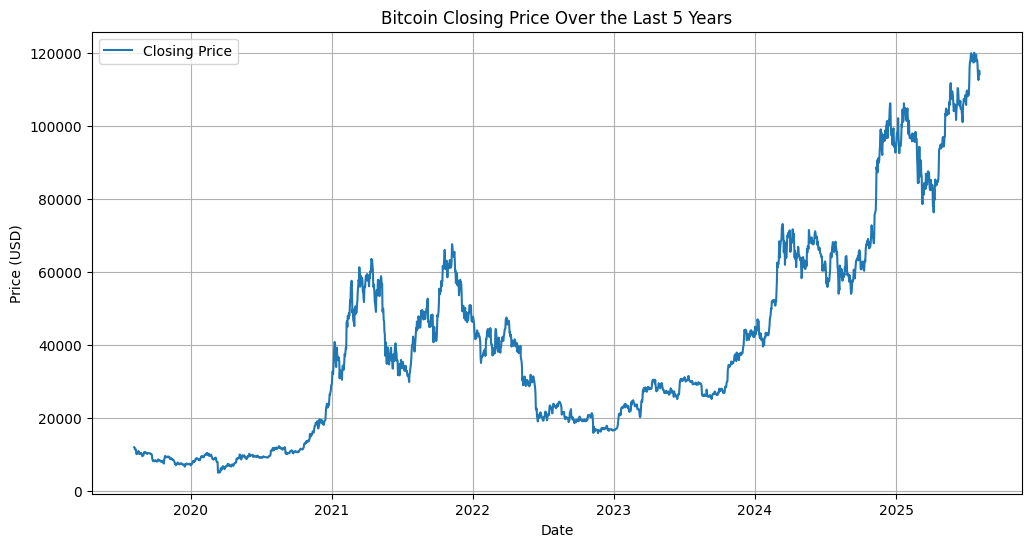

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()
plt.close()


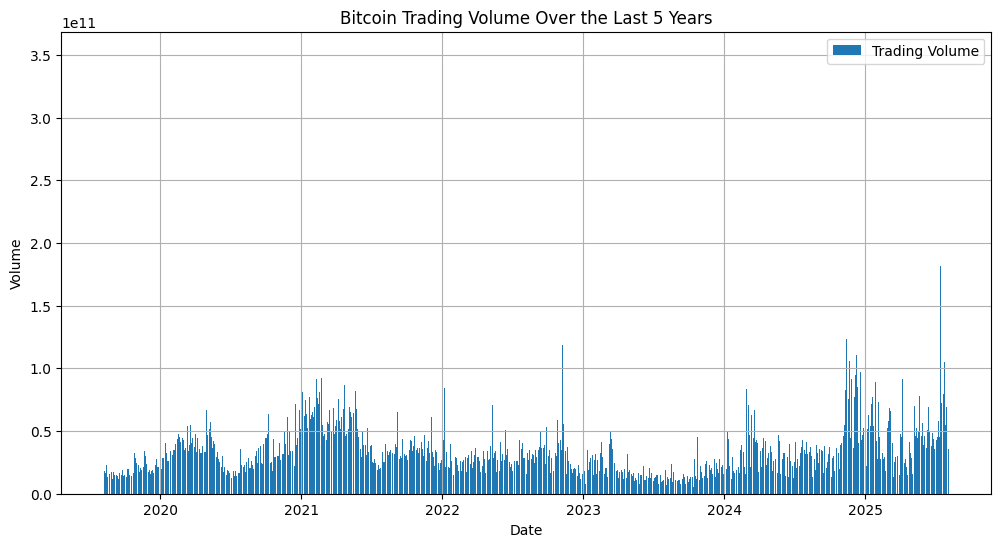

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], label='Trading Volume')
plt.title('Bitcoin Trading Volume Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

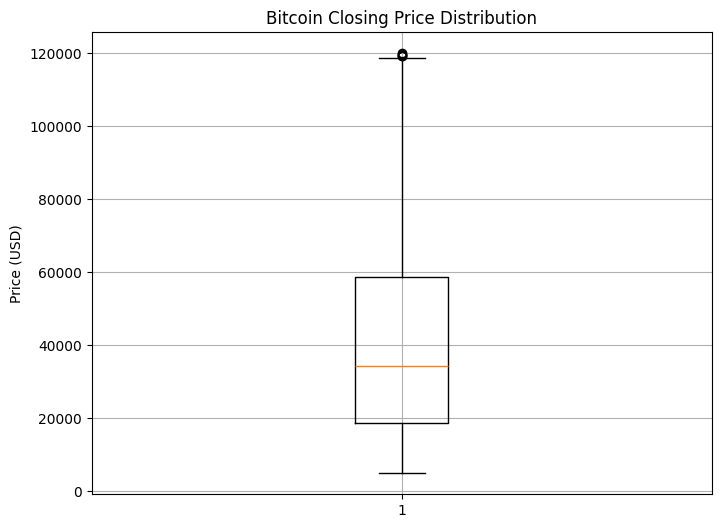

In [15]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Close'])
plt.title('Bitcoin Closing Price Distribution')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()
plt.close()

C:\Users\win10\AppData\Local\Temp\ipykernel_6552\3346641498.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_subset = df.last('1M')  # Last 3 months
C:\Users\win10\AppData\Local\Temp\ipykernel_6552\3346641498.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_subset = df.last('1M')  # Last 3 months


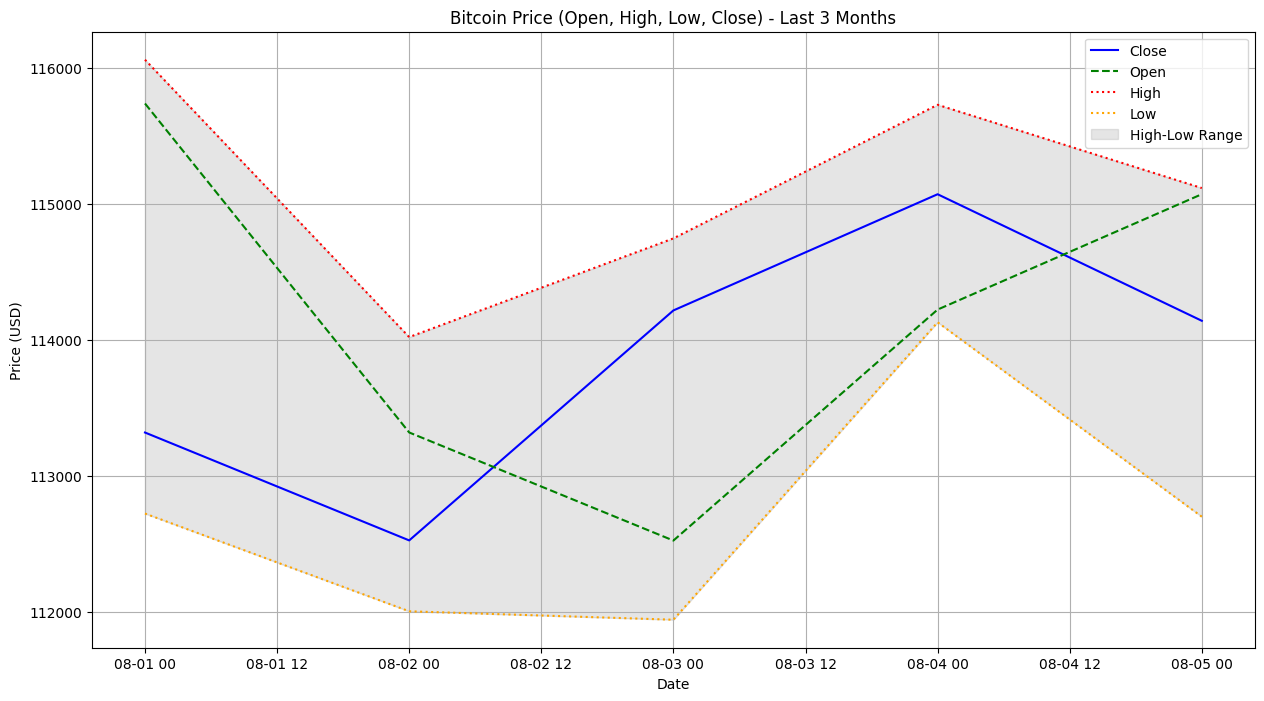

In [19]:
df_subset = df.last('1M')  # Last 3 months
plt.figure(figsize=(15, 8))
plt.plot(df_subset.index, df_subset['Close'], label='Close', color='blue')
plt.plot(df_subset.index, df_subset['Open'], label='Open', color='green', linestyle='--')
plt.plot(df_subset.index, df_subset['High'], label='High', color='red', linestyle=':')
plt.plot(df_subset.index, df_subset['Low'], label='Low', color='orange', linestyle=':')
plt.fill_between(df_subset.index, df_subset['Low'], df_subset['High'], color='gray', alpha=0.2, label='High-Low Range')
plt.title('Bitcoin Price (Open, High, Low, Close) - Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
plt.close()